In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import xarray as xr

def read_as_df(file_name):
    # Read file
    ds = xr.open_dataset(file_name)
    # Convert to dataframe
    df = ds.to_dataframe()

    # Unstack index (coorfinates)
    ## Get position of the coorfinates in index
    coordinates = ['lat', 'lon','time']
    ## For each coordinate, reset index:
    for coordinate in coordinates:
        position_index = df.index.names.index(coordinate)
        #print(position_index)
        df = df.reset_index(position_index)
    
    return df


In [145]:
Entomological_Data = pd.read_csv('entomologico_clean.csv') 
Entomological_Data_All = pd.read_csv('entomologico_clean.csv') 
Cases_Data_epi = pd.read_excel('cases_clean_epi.xlsx')  


#Number of Mosquitos

###Data processing 
Clean the  initial data set

In [ ]:
def month_int(data):
  return int(data.split('-')[1])

def elevation_int(data):
  return int(data.split(' ')[0])

def get_males(data):
    data_splitted = data.split('|')
    if len(data_splitted) > 1: mosquitos = data_splitted[0]
    else: mosquitos = data_splitted[0]
    mosquitos_splitted = mosquitos.split(' ')
    if len(mosquitos_splitted)> 1: return int(mosquitos_splitted[0])
    else: return 1

def get_females(data):
    data_splitted = data.split('|')
    if len(data_splitted) > 1: mosquitos = data_splitted[1]
    else: mosquitos = data_splitted[0]
    mosquitos_splitted = mosquitos.split(' ')
    if len(mosquitos_splitted) > 2: return int(mosquitos_splitted[1])
    elif len(mosquitos_splitted) > 1: return int(mosquitos_splitted[0])
    else: return 1

def transform_barrio(data):
  return ' '.join(data.split('_')[1:])

def epide_week(data):
  if data >= pd.to_datetime('2021-01-01') and data <= pd.to_datetime('2021-01-02'):
    return 53

  for i in range(52):
    if data >= pd.to_datetime('2021-01-03')+pd.Timedelta('{} days'.format(7*i)) and data < pd.to_datetime('2021-01-03')+pd.Timedelta('{} days'.format(7*(i+1))):
      return (i+1)


Entomological_Data = Entomological_Data.drop(['id','decimalLatitude','decimalLongitude','organismRemarks','county','locality','higherClassification',	'genus'	,'subgenus'	,'specificEpithet'	,'vernacularName'	], axis=1)
Entomological_Data = Entomological_Data.loc[Entomological_Data['scientificName'] != 'Culex quinquefasciatus', :]
Entomological_Data['eventDate'] = pd.to_datetime(Entomological_Data['eventDate'])

Entomological_Data['verbatimElevation'] = Entomological_Data['verbatimElevation'].transform(elevation_int)
Entomological_Data['eventID'] = Entomological_Data['eventID'].transform(transform_barrio)

Elevation_prom = Entomological_Data.loc[:,['eventID','verbatimElevation']]
Elevation_prom = Elevation_prom.groupby('eventID').mean()

Entomological_Data = Entomological_Data.drop(['sex'], axis=1)

Entomological_Data = Entomological_Data.drop(['scientificName'], axis =1)

Dictionaris to map the county into pavimentaiton, temperature and humidity
also the average of the elevantion per neigborhood

In [ ]:

ditc_pav={'Balboita': 0, 'Colseguros': 31, 'El Rosario': 31, 'El Triunfo':31, 'Fundadores':100, 'Hueco Lindo': 0, 'La Cabaña': 31, 'La Paz': 100, 'Libertador': 0, 
          'Olaya Herrera': 0, 'Popular':0, 'Porvenir': 31, 'Postobón': 0, 'Puerto Nuevo': 0, 'San Antonio': 31, 'Villa Prados': 100}


ditc_temp={'Balboita': 22.81, 'Colseguros': 22.9 , 'El Rosario': 22.9 , 'El Triunfo':22.9 , 'Fundadores':25.29, 'Hueco Lindo': 22.81, 'La Cabaña': 22.9, 'La Paz': 25.29,
           'Libertador': 22.81, 'Olaya Herrera': 22.81, 'Popular':22.81, 'Porvenir': 22.9 , 'Postobón': 22.81, 'Puerto Nuevo': 22.81, 'San Antonio': 22.9 ,
           'Villa Prados': 25.29}

ditc_hum={'Balboita': 84.87, 'Colseguros': 80.96, 'El Rosario': 80.96, 'El Triunfo':80.96, 'Fundadores':83.85, 'Hueco Lindo': 84.87, 'La Cabaña': 80.96, 
          'La Paz': 83.85, 'Libertador': 84.87, 
          'Olaya Herrera': 84.87, 'Popular':84.87, 'Porvenir': 80.96, 'Postobón': 84.87, 'Puerto Nuevo': 84.87, 'San Antonio': 80.96, 'Villa Prados': 83.85}

Elevation_prom['verbatimElevation'] = Elevation_prom['verbatimElevation'].transform(round)
ditc_elevation = Elevation_prom.to_dict()
print(ditc_elevation['verbatimElevation'])

{'Balboita': 1022, 'Colseguros': 1129, 'El Rosario': 1128, 'El Triunfo': 1110, 'Fundadores': 562, 'Hueco Lindo': 1003, 'La Cabaña': 1102, 'La Paz': 333, 'Libertador': 1000, 'Olaya Herrera': 991, 'Popular': 985, 'Porvenir': 1116, 'Postobón': 1000, 'Puerto Nuevo': 1027, 'San Antonio': 1110, 'Villa Prados': 327}


Get the dataset with number of mosquitos and elevation per neighborhood

In [ ]:

Entomological_Data ['individualCount'] = pd.to_numeric(Entomological_Data ['individualCount'])
Entomological_Data=Entomological_Data.groupby(['eventID']).sum().reset_index()
Entomological_Data

,eventID,individualCount,verbatimElevation
0,Balboita,23,12267
1,Colseguros,19,15806
2,El Rosario,36,18051
3,El Triunfo,2,2221
4,Fundadores,39,9559
5,Hueco Lindo,34,15044
6,La Cabaña,44,28644
7,La Paz,15,3666
8,Libertador,15,8003
9,Olaya Herrera,127,50518


In [ ]:
Entomological_Data['individualCount'].to_list()

[23, 19, 36, 2, 39, 34, 44, 15, 15, 127, 25, 28, 12, 70, 96, 23]

Add the pavimentation, temperature and humidity to the data set

In [ ]:
Entomological_Data['verbatimElevation'] = Entomological_Data['eventID']
Entomological_Data['verbatimElevation'] = Entomological_Data['verbatimElevation'].map(ditc_elevation['verbatimElevation'])

Entomological_Data['pav'] = Entomological_Data['eventID']
Entomological_Data['pav'] = Entomological_Data['pav'].map(ditc_pav)

Entomological_Data['hum'] = Entomological_Data['eventID']
Entomological_Data['hum'] = Entomological_Data['hum'].map(ditc_hum)

Entomological_Data['temp'] = Entomological_Data['eventID']
Entomological_Data['temp'] = Entomological_Data['temp'].map(ditc_temp)


In [ ]:

Entomological_Data

,eventID,individualCount,verbatimElevation,pav,hum,temp
0,Balboita,23,1022,0,84.87,22.81
1,Colseguros,19,1129,31,80.96,22.90
2,El Rosario,36,1128,31,80.96,22.90
3,El Triunfo,2,1110,31,80.96,22.90
4,Fundadores,39,562,100,83.85,25.29
5,Hueco Lindo,34,1003,0,84.87,22.81
6,La Cabaña,44,1102,31,80.96,22.90
7,La Paz,15,333,100,83.85,25.29
8,Libertador,15,1000,0,84.87,22.81
9,Olaya Herrera,127,991,0,84.87,22.81


In [ ]:
Entomological_Data.to_excel('Data.xlsx')

In [ ]:
Entomological_Data.describe()import folium
import statistics
from folium.plugins import HeatMap
import geopy
from geopy.extra.rate_limiter import RateLimiter

# Crear un objeto de mapa base Map() 
mapa = folium.Map(location=[mediaLat, mediaLong], zoom_start = 12) 

# Crear una capa de mapa de calor 
mapa_calor = HeatMap( list(zip(lats, longs, CM)), 
                     min_opacity=0.2, 
                     max_val=CM.max(), 
                     radius=50, 
                     blur=50, 
                     max_zoom=1)

centro_gravedad = {} 
centro_gravedad['longs'] = np.dot(longs, CM) / np.sum(CM) 
centro_gravedad['lats'] = np.dot(lats, CM) / np.sum(CM)

#Creamos el marcador de Centro de Gravedad 
tooltip = 'Centro de gravedad' 
folium.Marker([centro_gravedad['lats'], centro_gravedad['longs']], popup="Centro", tooltip = tooltip).add_to(mapa) 

# Adherimos la capa de mapa de calor al mapa principal 
mapa_calor.add_to(mapa) 
mapa

,individualCount,verbatimElevation,pav,hum,temp
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,38.000000,934.062500,30.375000,83.212500,23.308750
std,33.142118,271.134768,37.419914,1.841972,0.983862
min,2.000000,327.000000,0.000000,80.960000,22.810000
25%,18.000000,989.500000,0.000000,80.960000,22.810000
50%,26.500000,1012.500000,31.000000,83.850000,22.900000
75%,40.250000,1110.000000,31.000000,84.870000,22.900000
max,127.000000,1129.000000,100.000000,84.870000,25.290000


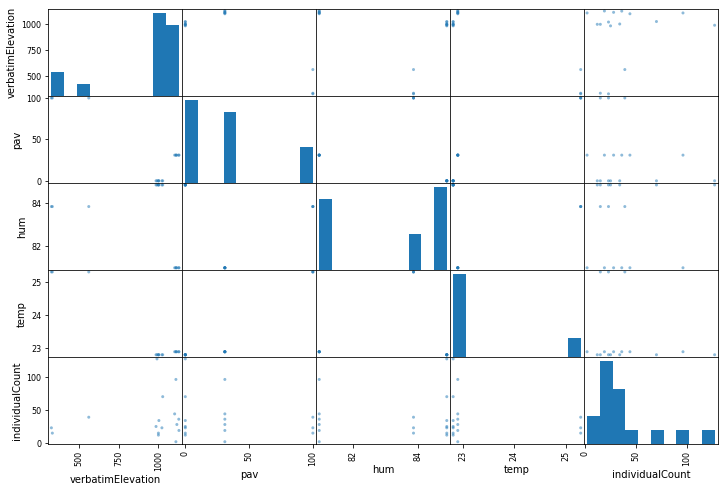

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes=["verbatimElevation",
            "pav", "hum",
            "temp","individualCount"]

scatter_matrix(Entomological_Data[attributes], figsize=(12,8))
plt.show()

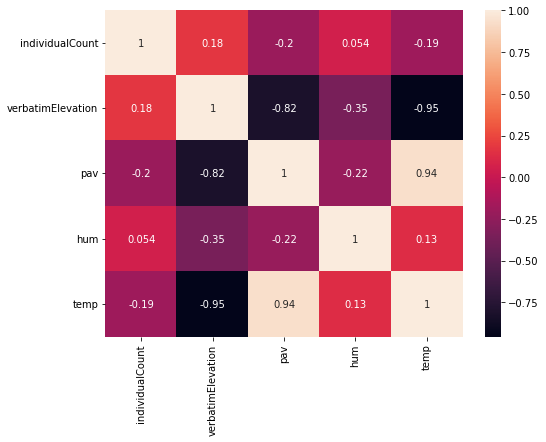

In [ ]:
corr_df = Entomological_Data.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

X = Entomological_Data.loc[:,["verbatimElevation",
            "pav", "hum",
            "temp"]].to_numpy()
y = Entomological_Data.individualCount.values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pred)

30.85137591882841

In [146]:
Entomological_Data_All.head()

,id,individualCount,sex,organismRemarks,eventID,eventDate,locationID,county,locality,verbatimElevation,decimalLatitude,decimalLongitude,scientificName,higherClassification,genus,subgenus,specificEpithet,vernacularName
0,INS:ProyectoDengue67217:Aed-001,5,2 Machos | 3 Hembras,Sin alimento de sangre,Barrio_Puerto_Nuevo,2021-02-10,CO:19532,Patía,Casa ubicada en el barrio Puerto Nuevo de Patí...,1024 m,2.128902,-76.973042,Aedes aegypti,Animalia | Arthropoda | Insecta | Diptera | Cu...,Aedes,Aedes (Stegomyia),aegypti,Zancudo común
1,INS:ProyectoDengue67217:Aed-002,1,Hembra,Sin alimento de sangre,Barrio_Puerto_Nuevo,2021-02-10,CO:19532,Patía,Casa ubicada en el barrio Puerto Nuevo de Patí...,1028 m,2.129389,-76.972715,Aedes aegypti,Animalia | Arthropoda | Insecta | Diptera | Cu...,Aedes,Aedes (Stegomyia),aegypti,Zancudo común
2,INS:ProyectoDengue67217:Aed-003,2,1 Macho | 1 Hembra,Hembra con sangre,Barrio_Puerto_Nuevo,2021-02-10,CO:19532,Patía,Casa ubicada en el barrio Puerto Nuevo de Patí...,1023 m,2.129656,-76.973285,Aedes aegypti,Animalia | Arthropoda | Insecta | Diptera | Cu...,Aedes,Aedes (Stegomyia),aegypti,Zancudo común
3,INS:ProyectoDengue67217:Culx-001,6,3 Machos | 3 Hembras,1 hembra con sangre,Barrio_Puerto_Nuevo,2021-02-10,CO:19532,Patía,Casa ubicada en el barrio Puerto Nuevo de Patí...,1023 m,2.129656,-76.973285,Culex quinquefasciatus,Animalia | Arthropoda | Insecta | Diptera | Cu...,Culex,Culex (Culex),quinquefasciatus,Mosquito
4,INS:ProyectoDengue67217:Culx-002,2,2 Hembras,1 hembra con sangre,Barrio_Puerto_Nuevo,2021-02-10,CO:19532,Patía,Casa ubicada en el barrio Puerto Nuevo de Patí...,1024 m,2.129929,-76.973326,Culex quinquefasciatus,Animalia | Arthropoda | Insecta | Diptera | Cu...,Culex,Culex (Culex),quinquefasciatus,Mosquito


In [170]:
# Calcular la media de las latitudes y las longitudes para centrar el mapa 
import statistics
mediaLong = statistics.mean(Entomological_Data_All.decimalLongitude.values) 
mediaLat = statistics.mean(Entomological_Data_All.decimalLatitude.values) 
longs = Entomological_Data_All.decimalLongitude.values 
lats = Entomological_Data_All.decimalLatitude.values 
#print(lats)
#lats.shape

#CM = np.random.rand(573)*1000
CM = np.asarray(Entomological_Data_All.individualCount.to_list(), dtype=float)
#np.asarray([23, 19, 36, 2, 39, 34, 44, 15, 15, 127, 25, 28, 12, 70, 96, 23])
#print(CM)

In [171]:
import folium
import statistics
from folium.plugins import HeatMap
import geopy
from geopy.extra.rate_limiter import RateLimiter

# Crear un objeto de mapa base Map() 
mapa = folium.Map(location=[mediaLat, mediaLong], zoom_start = 12) 

# Crear una capa de mapa de calor 
mapa_calor = HeatMap( list(zip(lats, longs, CM)), 
                     min_opacity=0.2, 
                     max_val=CM.max(), 
                     radius=50, 
                     blur=50, 
                     max_zoom=1)

centro_gravedad = {} 
centro_gravedad['longs'] = np.dot(longs, CM) / np.sum(CM) 
centro_gravedad['lats'] = np.dot(lats, CM) / np.sum(CM)

#Creamos el marcador de Centro de Gravedad 
tooltip = 'Centro de gravedad' 
folium.Marker([centro_gravedad['lats'], centro_gravedad['longs']], popup="Centro", tooltip = tooltip).add_to(mapa) 

# Adherimos la capa de mapa de calor al mapa principal 
mapa_calor.add_to(mapa) 
mapa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  app.launch_new_instance()
